## Feel free to use the code, however, make sure to properly cite the database for any pubications. Data and citation information can be downloaded (for free) from 

https://edgar.jrc.ec.europa.eu/report_2023

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import plotly.express as px
import os
#You will also need to install openyxl !pip install openpyxl (or your favorite xlxs librarie)

In [3]:
#this variable will help to save the plots on the desired folders
cwd = os.getcwd()

In [37]:
# Data link, file name. Necessary to download de data base
url = "https://edgar.jrc.ec.europa.eu/booklet/EDGARv8.0_FT2022_GHG_booklet_2023.xlsx"
filename = cwd+"/dataframes/EDGARv8.0_FT2022_GHG_booklet_2023.xlsx" 

In [40]:
#Download file
response = requests.get(url)
with open(filename, 'wb') as f:
    f.write(response.content)

### Once the file has downloaded to your computer I recommend you to give it a quick look

In [14]:
#Create df and select sheet of interest 
df_by_sector = pd.read_excel(filename, sheet_name="GHG_by_sector_and_country")

In [15]:
df_by_sector.head(5)

,Substance,Sector,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,CO2,Agriculture,AFG,Afghanistan,0.029229,0.029229,0.029229,0.029229,0.039967,0.045310,...,0.055157,0.084490,0.116967,0.162800,0.310881,0.160914,0.150438,0.064795,0.054361,0.046161
1,CO2,Agriculture,ALB,Albania,0.113300,0.113300,0.113300,0.113300,0.113614,0.112514,...,0.032738,0.056624,0.058719,0.049605,0.056676,0.048976,0.069405,0.063067,0.063936,0.064880
2,CO2,Agriculture,ARG,Argentina,0.104343,0.104343,0.104343,0.104343,0.087214,0.077314,...,0.999167,1.145152,0.892257,1.359547,1.278200,1.636119,1.703062,1.925471,2.108103,2.323375
3,CO2,Agriculture,ARM,Armenia,0.055288,0.055288,0.055288,0.055288,0.059966,0.059966,...,0.021686,0.022629,0.022629,0.022471,0.034257,0.035986,0.043738,0.035410,0.036038,0.036771
4,CO2,Agriculture,AUS,Australia,0.311143,0.311143,0.311143,0.311143,0.311143,0.268190,...,2.128866,2.182924,2.291771,2.505224,2.641204,2.155371,2.290200,2.433043,2.452371,2.471969


In [16]:
df_by_sector.tail(5)

,Substance,Sector,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
4825,GWP_100_AR5_N2O,Industrial Combustion,GLOBAL TOTAL,GLOBAL TOTAL,12.397988,11.584259,11.871221,12.287900,12.354813,12.250507,...,26.166433,26.218647,25.895386,25.365524,25.023274,24.913290,24.657630,24.831537,25.639218,25.899784
4826,GWP_100_AR5_N2O,Power Industry,GLOBAL TOTAL,GLOBAL TOTAL,11.100270,11.240278,11.853623,12.610785,12.751199,13.214322,...,72.917947,74.190856,71.792336,72.934077,76.201750,79.686666,80.632232,77.328504,82.771134,82.952431
4827,GWP_100_AR5_N2O,Processes,GLOBAL TOTAL,GLOBAL TOTAL,412.890715,418.058877,429.106436,456.801389,471.303599,455.452685,...,376.254252,377.567253,376.203483,376.550752,379.225210,383.946377,383.914429,383.169423,402.154637,399.441299
4828,GWP_100_AR5_N2O,Transport,GLOBAL TOTAL,GLOBAL TOTAL,34.180071,34.791768,37.095585,39.282634,39.576460,40.013271,...,97.818547,99.396521,101.018934,102.374449,105.013588,106.975725,108.522331,96.959415,104.219534,107.517225
4829,GWP_100_AR5_N2O,Waste,GLOBAL TOTAL,GLOBAL TOTAL,43.723239,44.416307,45.069140,46.143266,46.973226,48.024457,...,108.441433,110.266678,112.480121,114.776275,116.946325,118.366330,119.622091,120.935297,122.627993,124.364486


In [17]:
#While looking at the xlxs file I saw some completley empty rows
df_by_sector.dropna(how='all', inplace=True) #delete rows with all nan values 

In [18]:
#Delete Country code column, not really necessary
del df_by_sector["EDGAR Country Code"]

In [19]:
#Shape of df
print(f"Data frame rows x columns: {df_by_sector.shape}")

Data frame rows x columns: (4828, 56)


In [20]:
#For this excercise I am only interested in CO2 emissions
df_co2 = df_by_sector[df_by_sector["Substance"]=="CO2"]

In [21]:
#Verify null values
df_co2.isnull().sum()

Substance     0
Sector        0
Country       0
1970         48
1971         48
1972         47
1973         43
1974         45
1975         43
1976         38
1977         37
1978         34
1979         34
1980         45
1981         46
1982         47
1983         44
1984         45
1985         46
1986         45
1987         46
1988         46
1989         47
1990         45
1991         48
1992         46
1993         49
1994         48
1995         46
1996         43
1997         43
1998         46
1999         48
2000         48
2001         46
2002         49
2003         44
2004         29
2005         28
2006         32
2007         47
2008         49
2009         45
2010         45
2011         45
2012         41
2013         54
2014         54
2015         54
2016         55
2017         53
2018         54
2019         53
2020         53
2021         52
2022         52
dtype: int64

In [22]:
# Now that I know there are no completely empty rows there still are quite a few null values,
# while doing research I found the methods FFill and BFill. Which for this excercise are usefull
nulls = df_co2.isna().sum()

# Iteration on null values
for i in nulls.index:
    if nulls[i] > 0:
        # It was important to use .loc to avoid a series of warnings I was getting 
        df_co2.loc[:, i] = df_co2[i].ffill().bfill()

# Verify that there are no more empty values
print(df_co2.isna().sum())


Substance    0
Sector       0
Country      0
1970         0
1971         0
1972         0
1973         0
1974         0
1975         0
1976         0
1977         0
1978         0
1979         0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
2014         0
2015         0
2016         0
2017         0
2018         0
2019         0
2020         0
2021         0
2022         0
dtype: int64


In [28]:
#Lets save de cleaned df
co2_emissions_by_country = df_co2.to_excel(cwd+"/dataframes/co2_emissions_by_country.xlsx")

In [25]:
# I am from Mexico so lets Filter data for Mexico. You could replace it with your country(ies) of interest
mexico_emissions = df_co2[df_co2["Country"]=="Mexico"]

In [26]:
# Sectors
for sector in mexico_emissions["Sector"].unique():
    print(sector)

Agriculture
Buildings
Fuel Exploitation
Industrial Combustion
Power Industry
Processes
Transport
Waste


In [29]:
#Save Mexico's new df
mexico_emissions.to_excel(cwd+"/dataframes/mexico_emissions_by_sector.xlsx")

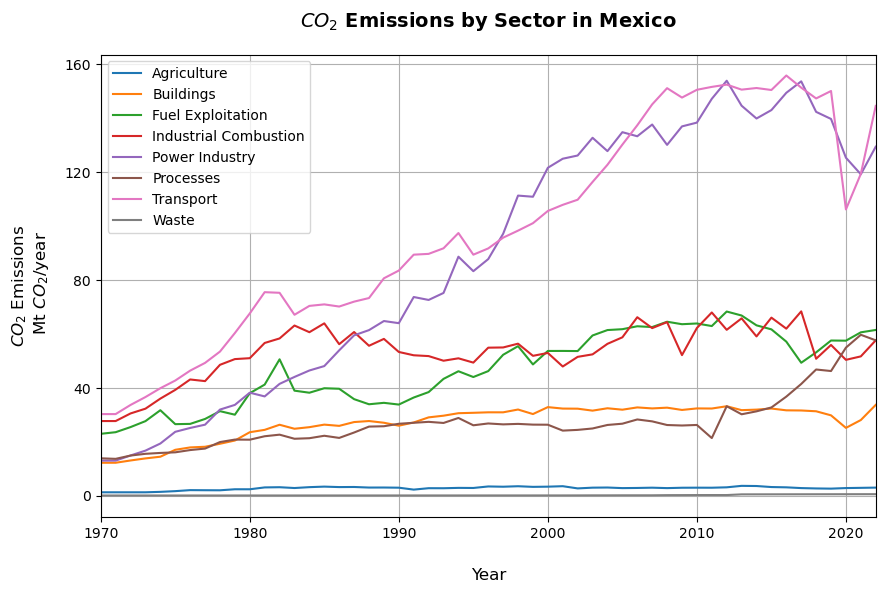

In [30]:
#Plots 

# Select the columns with the years, and plot the evolutions of emissions by sector over time.
years = mexico_emissions.columns[3:]  
sectors = mexico_emissions['Sector'].unique()

# Size if the plot
plt.figure(figsize=(10, 6))

for sector in sectors:
    sector_data = mexico_emissions[mexico_emissions['Sector'] == sector]
    plt.plot(years, sector_data.iloc[0, 3:], label=sector)  # Selecciona solo las columnas de años

#X axis parameters
plt.xlabel('Year', fontsize=12, labelpad=20)
plt.xticks(range(1970, 2022, 10))
plt.xlim(years[0], years[-1]) # the with of the plot depends on the min an max values

#Y axis parameter
plt.ylabel('$CO_2$ Emissions \n Mt $CO_2$/year',fontsize=12, labelpad=10)
plt.yticks(range(0, 180, 40))

plt.title('$CO_2$ Emissions by Sector in Mexico', fontweight='bold', fontsize=14, pad =20)
plt.legend()
plt.grid(True)

plt.savefig(cwd+'/plots/co2_by_sector_mexico.png', dpi=300,bbox_inches='tight')
plt.show()

In [31]:
#I am also interested in  seeing the Global total emissions per sector. 
global_emissions = df_co2[df_co2["Country"]=="GLOBAL TOTAL"] #Filter 

In [33]:
#Save Global emissions df
global_emissions.to_excel(cwd+"/dataframes/global_emissions_by_sector.xlsx")

In [32]:
global_emissions.head(10)

,Substance,Sector,Country,1970,1971,1972,1973,1974,1975,1976,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
4805,CO2,Agriculture,GLOBAL TOTAL,49.143283,49.143283,49.143283,49.143283,49.900345,54.512382,57.643820,...,137.920709,135.111781,138.413771,137.553728,135.685405,135.820967,141.110971,147.753032,150.030462,150.578788
4806,CO2,Buildings,GLOBAL TOTAL,2926.458212,2939.568254,3056.870832,3120.449101,3040.634678,3115.179435,3242.335508,...,3348.541483,3290.896455,3316.769667,3350.949539,3417.541433,3438.824551,3354.125564,3276.605542,3439.731944,3421.570589
4807,CO2,Fuel Exploitation,GLOBAL TOTAL,1562.255701,1574.399637,1654.467714,1828.873474,1824.605510,1684.688473,1817.499829,...,2380.040377,2353.519533,2423.164826,2337.226059,2395.358939,2450.310126,2568.598204,2417.096663,2512.622459,2531.898467
4808,CO2,Industrial Combustion,GLOBAL TOTAL,3744.304794,3511.720997,3602.041957,3788.025165,3774.962595,3648.618031,3816.719147,...,6358.823576,6425.251996,6286.635590,6130.934194,6067.820582,6206.749116,6210.739740,6180.972984,6497.622733,6537.543097
4809,CO2,Power Industry,GLOBAL TOTAL,3823.699383,3910.981426,4189.105946,4524.711259,4603.893544,4695.749014,5054.509215,...,13626.198777,13686.203497,13387.051673,13441.578780,13754.018475,14203.600518,14084.000693,13584.103765,14533.292803,14669.268624
4810,CO2,Processes,GLOBAL TOTAL,915.670265,921.879024,990.161466,1030.394452,1007.746632,968.063445,1042.827320,...,2823.739311,2886.012067,2857.742279,2961.481736,3024.544013,3107.404930,3179.210691,3219.705290,3321.229500,3226.348495
4811,CO2,Transport,GLOBAL TOTAL,2796.286627,2876.504749,3045.881595,3221.973378,3191.503489,3275.104998,3407.824223,...,7373.902587,7497.303796,7732.101875,7879.176335,8078.337024,8271.762783,8269.917085,7101.115862,7610.481612,7967.586312
4812,CO2,Waste,GLOBAL TOTAL,7.605313,7.779282,7.957965,8.139190,8.320052,8.498052,8.644685,...,17.582257,16.002458,16.964262,17.139000,16.988838,17.394372,17.203049,17.117073,17.152272,17.203485


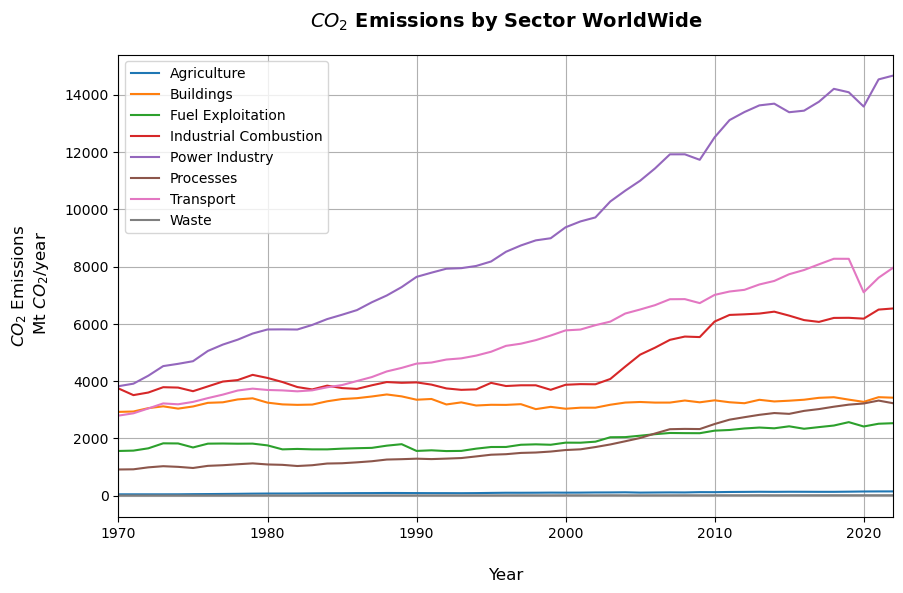

In [34]:
#Plots 

# We have to select the columns where the years are, and plot in a line the evolutions of emissions by sector
years = global_emissions.columns[3:]  
sectors = global_emissions['Sector'].unique()

# Size if the plot
plt.figure(figsize=(10, 6))

for sector in sectors:
    sector_data = global_emissions[global_emissions['Sector'] == sector]
    plt.plot(years, sector_data.iloc[0, 3:], label=sector)  # Selecciona solo las columnas de años

#X axis parameters
plt.xlabel('Year', fontsize=12, labelpad=20)
plt.xticks(range(1970, 2022, 10))
plt.xlim(years[0], years[-1]) # the with of the plot depends on the min an max values

#Y axis parameter
plt.ylabel('$CO_2$ Emissions \n Mt $CO_2$/year',fontsize=12, labelpad=10)
plt.yticks()

plt.title('$CO_2$ Emissions by Sector WorldWide', fontweight='bold', fontsize=14, pad =20)
plt.legend()
plt.grid(True)

plt.savefig(cwd+'/plots/co2_global.png', dpi=300,bbox_inches='tight')
plt.show()

In [41]:
#Lets try to plot on a map CO2 emissions per country per year 
#We need to daccess another sheet of the original excel file]
df_total_global_emissions = pd.read_excel(filename, sheet_name="GHG_totals_by_country")

In [42]:
df_total_global_emissions.dropna(how='all', inplace=True) #delete rows with all nan values 

In [43]:
df_total_global_emissions.isna().sum()

EDGAR Country Code    0
Country               0
1970                  0
1971                  0
1972                  0
1973                  0
1974                  0
1975                  0
1976                  0
1977                  0
1978                  0
1979                  0
1980                  0
1981                  0
1982                  0
1983                  0
1984                  0
1985                  0
1986                  0
1987                  0
1988                  0
1989                  0
1990                  0
1991                  0
1992                  0
1993                  0
1994                  0
1995                  0
1996                  0
1997                  0
1998                  0
1999                  0
2000                  0
2001                  0
2002                  0
2003                  0
2004                  0
2005                  0
2006                  0
2007                  0
2008                  0
2009            

In [44]:
df_total_global_emissions.tail(10)

,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,1976,1977,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
202,VGB,British Virgin Islands,0.009209,0.009252,0.010927,0.011037,0.010051,0.011839,0.010902,0.011873,...,0.077019,0.079281,0.077916,0.082682,0.071646,0.096520,0.086677,0.075006,0.072828,0.075378
203,VNM,Vietnam,94.250849,93.609548,94.205877,98.116610,96.139574,95.936444,95.168375,98.912316,...,319.963137,336.296019,358.061621,379.760676,386.338156,441.912154,493.761386,499.453292,496.725033,489.159235
204,VUT,Vanuatu,0.297814,0.319777,0.327793,0.370030,0.405293,0.397518,0.408780,0.404547,...,0.710164,0.737986,0.670875,0.598131,0.637847,0.693003,0.669333,0.610710,0.598738,0.585919
205,WSM,Samoa,0.169019,0.169558,0.174608,0.189966,0.213752,0.201265,0.202346,0.207773,...,0.518996,0.528037,0.588901,0.595992,0.592704,0.590678,0.598322,0.542746,0.548005,0.548424
206,YEM,Yemen,5.959267,6.270612,6.542562,6.860259,7.098483,7.133939,7.469902,7.615805,...,58.257099,56.945023,35.067268,30.197869,31.807064,34.853295,36.611258,35.648247,36.986769,38.006043
207,ZAF,South Africa,243.936906,243.544531,250.939841,270.120645,279.293423,297.591817,313.713625,316.015052,...,601.888491,615.452486,590.086767,590.391418,602.773396,605.788699,611.136564,551.464312,548.475888,534.531652
208,ZMB,Zambia,12.784942,13.054113,13.658804,14.136910,14.379248,14.693533,15.145700,14.920682,...,24.162291,24.830244,24.986546,25.575795,27.241617,28.423766,28.645330,28.953793,29.684857,30.330585
209,ZWE,Zimbabwe,22.245786,22.859421,22.516027,24.140295,24.239679,23.566684,24.709480,23.932646,...,32.927064,30.691499,31.610375,29.676863,29.174904,31.273375,30.207339,28.341567,29.525357,30.190141
211,EU27,EU27,4611.325766,4637.851097,4788.933368,5005.025057,4963.517082,4878.009116,5145.629069,5133.688874,...,4019.150279,3869.441688,3922.022084,3926.561741,3952.329493,3870.920359,3713.097654,3427.439824,3617.735706,3587.796150
213,GLOBAL TOTAL,GLOBAL TOTAL,24497.544419,24582.920914,25521.454040,26733.859337,26742.384120,26798.454097,27950.655931,28635.109842,...,49875.675088,50242.997508,50134.383764,50343.044450,51195.419111,52398.143260,52557.335275,50632.309454,53056.607721,53786.038909


In [45]:
del df_total_global_emissions["EDGAR Country Code"]

In [46]:
df_total_global_emissions.tail(4)

,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
208,Zambia,12.784942,13.054113,13.658804,14.136910,14.379248,14.693533,15.145700,14.920682,14.761295,...,24.162291,24.830244,24.986546,25.575795,27.241617,28.423766,28.645330,28.953793,29.684857,30.330585
209,Zimbabwe,22.245786,22.859421,22.516027,24.140295,24.239679,23.566684,24.709480,23.932646,22.927316,...,32.927064,30.691499,31.610375,29.676863,29.174904,31.273375,30.207339,28.341567,29.525357,30.190141
211,EU27,4611.325766,4637.851097,4788.933368,5005.025057,4963.517082,4878.009116,5145.629069,5133.688874,5302.605654,...,4019.150279,3869.441688,3922.022084,3926.561741,3952.329493,3870.920359,3713.097654,3427.439824,3617.735706,3587.796150
213,GLOBAL TOTAL,24497.544419,24582.920914,25521.454040,26733.859337,26742.384120,26798.454097,27950.655931,28635.109842,29238.852347,...,49875.675088,50242.997508,50134.383764,50343.044450,51195.419111,52398.143260,52557.335275,50632.309454,53056.607721,53786.038909


In [27]:
#print(df_total_global_emissions.index)

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       202, 203, 204, 205, 206, 207, 208, 209, 211, 213],
      dtype='int64', length=212)


In [47]:
df_total_global_emissions = df_total_global_emissions[df_total_global_emissions.ne('GLOBAL TOTAL').all(axis=1)]
 # delete GLOBAL TOTAL values so it does not affect the scale on the outcome map as the index corresponds to numeric values this line of code will delete
    #ne = not equal will iterate over "all the rows axis=1 (axis=0, will do it on columns), and "

In [48]:
df_total_global_emissions.tail(5)

,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
206,Yemen,5.959267,6.270612,6.542562,6.860259,7.098483,7.133939,7.469902,7.615805,7.978296,...,58.257099,56.945023,35.067268,30.197869,31.807064,34.853295,36.611258,35.648247,36.986769,38.006043
207,South Africa,243.936906,243.544531,250.939841,270.120645,279.293423,297.591817,313.713625,316.015052,295.684442,...,601.888491,615.452486,590.086767,590.391418,602.773396,605.788699,611.136564,551.464312,548.475888,534.531652
208,Zambia,12.784942,13.054113,13.658804,14.136910,14.379248,14.693533,15.145700,14.920682,14.761295,...,24.162291,24.830244,24.986546,25.575795,27.241617,28.423766,28.645330,28.953793,29.684857,30.330585
209,Zimbabwe,22.245786,22.859421,22.516027,24.140295,24.239679,23.566684,24.709480,23.932646,22.927316,...,32.927064,30.691499,31.610375,29.676863,29.174904,31.273375,30.207339,28.341567,29.525357,30.190141
211,EU27,4611.325766,4637.851097,4788.933368,5005.025057,4963.517082,4878.009116,5145.629069,5133.688874,5302.605654,...,4019.150279,3869.441688,3922.022084,3926.561741,3952.329493,3870.920359,3713.097654,3427.439824,3617.735706,3587.796150


In [67]:
# Select columns containing the years
years = df_total_global_emissions.columns[1:] 

df_total_global_emissions = df_total_global_emissions[['Country'] + list(years)] # Unpivot the DataFrame to have 'Year' and 'Emissions' columns 
df_total_global_emissions_long = df_total_global_emissions.melt(id_vars="Country", var_name="Year", value_name="Emissions")

# Create a new DataFrame to have "Country", 'Year' and 'Emissions' columns
df_total_global_emissions_long = df_total_global_emissions.melt(id_vars="Country", 
                                                                var_name="Year", 
                                                                value_name="Emissions")
#Divide Mt by 1000 to get the units in Gt
df_total_global_emissions_long["Emissions"] = df_total_global_emissions_long["Emissions"]/1000

# Interactive plot
fig = px.choropleth(df_total_global_emissions_long, 
                    locations="Country",
                    locationmode='country names',
                    color="Emissions",
                    hover_name="Country",
                    animation_frame="Year",
                    projection="natural earth",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="CO<sub>2</sub> Emissions by <br> Country Over Time")

# Mostrar el gráfico
fig.write_html(cwd+"/interactive_maps/co2_emissions_over_time.html")
fig.show()

In [49]:
#Why does Spain, Italy, Sudan, Turkey, Serbia appeared to have no value? It seems that on the original df, some countries are grouped together 
#making that de module does not detect them
#I think that we can filter in the column Country cells that include the word "and"

grouped_countries = df_total_global_emissions[df_total_global_emissions['Country'].str.contains(" and |, ", regex=True)]

#Show grouped countries
print(grouped_countries['Country'].unique())


['Antigua and Barbuda' 'Bosnia and Herzegovina'
 'Switzerland and Liechtenstein' 'Spain and Andorra' 'France and Monaco'
 'Israel and Palestine, State of' 'Italy, San Marino and the Holy See'
 'Saint Kitts and Nevis' 'Serbia and Montenegro' 'Sudan and South Sudan'
 'Saint Helena, Ascension and Tristan da Cunha'
 'Saint Pierre and Miquelon' 'São Tomé and Príncipe'
 'Turks and Caicos Islands' 'Trinidad and Tobago'
 'Saint Vincent and the Grenadines']


In [ ]:
#I am currently working on solving the latter issue